Loading datasets...
Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 624 images belonging to 2 classes.
Building the model...
Compiling the model...
Training the model...


/Users/randolfpangilinjr/Documents/456/cecs456-project/venv/lib/python3.9/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/randolfpangilinjr/Documents/456/cecs456-project/venv/lib/python3.9/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
163/163 ━━━━━━━━━━━━━━━━━━━━ 27s 164ms/step - accuracy: 0.8306 - loss: 0.4676 - val_accuracy: 0.9375 - val_loss: 0.2286
Epoch 2/5
163/163 ━━━━━━━━━━━━━━━━━━━━ 26s 159ms/step - accuracy: 0.9607 - loss: 0.1077 - val_accuracy: 0.7500 - val_loss: 0.4035
Epoch 3/5
163/163 ━━━━━━━━━━━━━━━━━━━━ 26s 159ms/step - accuracy: 0.9683 - loss: 0.0976 - val_accuracy: 0.9375 - val_loss: 0.1200
Epoch 4/5
163/163 ━━━━━━━━━━━━━━━━━━━━ 26s 161ms/step - accuracy: 0.9718 - loss: 0.0774 - val_accuracy: 0.9375 - val_loss: 0.1670
Epoch 5/5
163/163 ━━━━━━━━━━━━━━━━━━━━ 27s 162ms/step - accuracy: 0.9821 - loss: 0.0578 - val_accuracy: 0.8125 - val_loss: 0.2468
Evaluating the model on test data...
208/208 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.7130 - loss: 1.3446
Test Accuracy: 0.72
Test Loss: 1.36


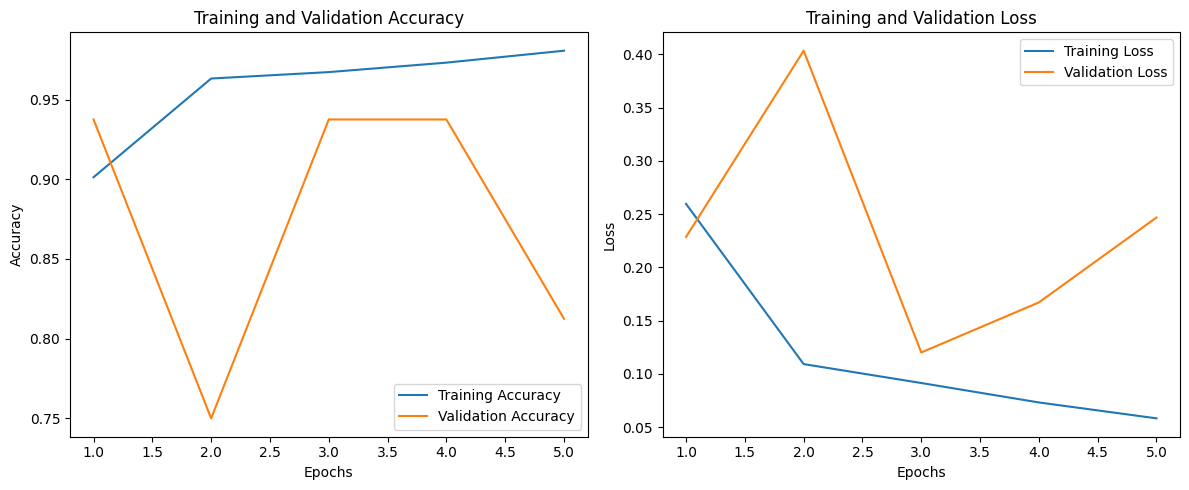

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


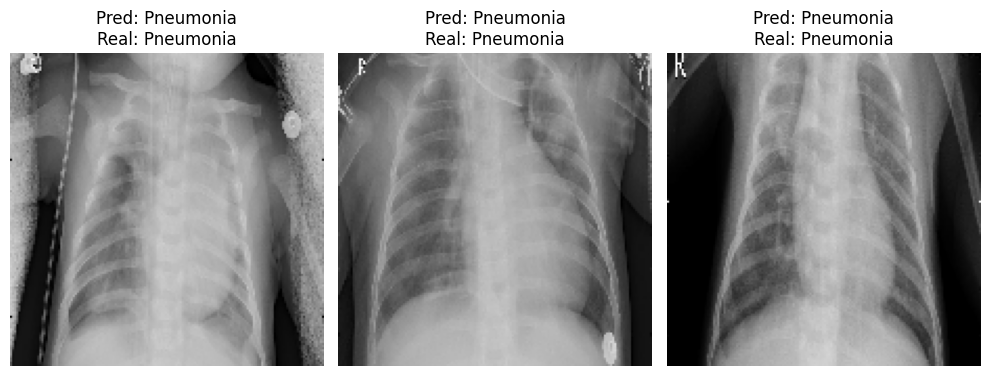

In [13]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np

# Function to load data
def load_data(data_dir, img_size=(150, 150), batch_size=32):
    """ Load images from a directory using Keras ImageDataGenerator. """
    datagen = ImageDataGenerator(rescale=1./255)

    return datagen.flow_from_directory(
        data_dir,
        target_size=img_size,
        batch_size=batch_size,
        class_mode='binary'
    )

# Function to build the CNN model
def build_cnn():
    """ Builds a Convolutional Neural Network (CNN) for binary classification. """
    model = Sequential([
        Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=[150, 150, 3]),
        MaxPooling2D(pool_size=(2, 2)),
        Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
        MaxPooling2D(pool_size=(2, 2)),
        Flatten(),
        Dense(units=128, activation='relu'),
        Dropout(0.5),
        Dense(units=1, activation='sigmoid')  # Binary classification
    ])
    return model

# Plot training and validation accuracy
def plot_training_history(history):
    """ Plots the training and validation accuracy and loss over epochs. """
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(1, len(acc) + 1)

    # Plot accuracy
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(epochs, acc, label='Training Accuracy')
    plt.plot(epochs, val_acc, label='Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    # Plot loss
    plt.subplot(1, 2, 2)
    plt.plot(epochs, loss, label='Training Loss')
    plt.plot(epochs, val_loss, label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

# Main function
if __name__ == "__main__":
    # Paths to dataset directories
    train_dir = "../chest_xray/train"
    val_dir = "../chest_xray/val"
    test_dir = "../chest_xray/test"

    # Load datasets
    print("Loading datasets...")
    train_gen = load_data(train_dir)  # Augmentation for training
    val_gen = load_data(val_dir)
    test_gen = load_data(test_dir, batch_size=3)

    # Build the model
    print("Building the model...")
    model = build_cnn()

    # Compile the model
    print("Compiling the model...")
    model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

    # Train the model
    print("Training the model...")
    history = model.fit(
        train_gen,
        batch_size=100,
        validation_data=val_gen,
        epochs=5
    )

    # Evaluate the model
    print("Evaluating the model on test data...")
    test_loss, test_acc = model.evaluate(test_gen)
    print(f"Test Accuracy: {test_acc:.2f}")
    print(f"Test Loss: {test_loss:.2f}")

    # Plot results of training and validation accuracy
    plot_training_history(history)

    # Visualize the results
    # Get a batch of test images
    x_test, y_test = next(test_gen)  # Fetch one batch from the test generator
    x_new = x_test[:3]               # Select the first 3 images
    y_real = y_test[:3]              # True labels for these images

    # Predict the class probabilities
    y_proba = model.predict(x_new)
    y_pred = (y_proba > 0.5).astype("int32")  # Convert probabilities to binary predictions

    # Define class names
    class_names = ["Normal", "Pneumonia"]

    # Display predictions and actual images
    plt.figure(figsize=(10, 4))
    for index, image in enumerate(x_new):
        plt.subplot(1, 3, index + 1)
        plt.imshow(image, cmap="gray")  # Display X-ray image
        plt.axis('off')

        # Predicted and actual labels
        pred_label = class_names[y_pred[index][0]]
        true_label = class_names[int(y_real[index])]
        plt.title(f"Pred: {pred_label}\nReal: {true_label}", fontsize=12)

    plt.tight_layout()
    plt.show()


In [ ]:
# Function to load data
def load_data(data_dir, img_size=(150, 150), batch_size=32, augment=False):
    """ Load images from a directory using Keras ImageDataGenerator. """
    if augment:  # Data augmentation for training
        datagen = ImageDataGenerator(
            rescale=1./255,
            rotation_range=20,
            width_shift_range=0.2,
            height_shift_range=0.2
        )
    else:
        datagen = ImageDataGenerator(rescale=1./255)

    return datagen.flow_from_directory(
        data_dir,
        target_size=img_size,
        batch_size=batch_size,
        class_mode='binary'
    )